<a href="https://colab.research.google.com/github/alwaysalearner1234/ML02/blob/main/KFold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


KFold Cross Validation
---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

Logistic Regression



In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9592592592592593


SVM

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9722222222222222

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracies:
Logistic Regression: 0.978
SVM: 1.000
Random Forest: 1.000


NameError: name 'logistic_regression_acc' is not defined

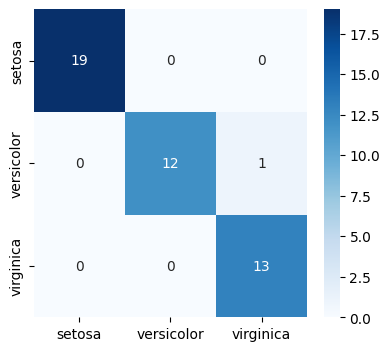

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load dataset
data = sns.load_dataset('iris')

# Split features and target
X = data.drop('species', axis=1)
y = data['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 1️⃣ Logistic Regression
# -----------------------------
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
lr_acc = lr.score(X_test, y_test)
lr_pred = lr.predict(X_test)

# -----------------------------
# 2️⃣ Support Vector Machine
# -----------------------------
svm = SVC(gamma='scale')  # 'scale' usually works better than 'auto'
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
svm_pred = svm.predict(X_test)

# -----------------------------
# 3️⃣ Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=40, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
rf_pred = rf.predict(X_test)

# -----------------------------
# 📊 Accuracy Comparison
# -----------------------------
print("Model Accuracies:")
print(f"Logistic Regression: {lr_acc:.3f}")
print(f"SVM: {svm_acc:.3f}")
print(f"Random Forest: {rf_acc:.3f}")

# -----------------------------
# 🔥 Confusion Matrices as Heatmaps
# -----------------------------
models = {'Logistic Regression': lr_pred, 'SVM': svm_pred, 'Random Forest': rf_pred}

plt.figure(figsize=(15, 4))
for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, pred, labels=lr.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=lr.classes_, yticklabels=lr.classes_)
    plt.title(f"{name}\nAccuracy: {eval(name.lower().replace(' ', '_') + '_acc'):.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


KFold cross validation


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
# Import libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model
model = LogisticRegression(solver='liblinear', multi_class='ovr')

# Store accuracy for each fold
accuracies = []

# Perform K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold} → Accuracy: {acc:.3f}")

# Calculate average accuracy
print("\nAverage Accuracy across folds:", np.mean(accuracies).round(3))


Fold 1 → Accuracy: 1.000
Fold 2 → Accuracy: 0.933
Fold 3 → Accuracy: 0.933
Fold 4 → Accuracy: 0.967
Fold 5 → Accuracy: 0.967

Average Accuracy across folds: 0.96


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[0 2 3 4 5 6 8] [1 7]
[1 2 3 4 6 7 8] [0 5]
[0 1 3 4 5 6 7] [2 8]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 5 7 8] [6]


Use KFold for our digits example

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
scores_logistic


[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [ ]:
scores_svm


[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [ ]:
scores_rf


[0.9298831385642737, 0.9515859766277128, 0.9332220367278798]

cross_val_score function


In [ ]:
from sklearn.model_selection import cross_val_score


Logistic regression model performance using cross_val_score



In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0.89482471, 0.95325543, 0.90984975])

svm model performance using cross_val_score



In [ ]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)


array([0.38063439, 0.41068447, 0.51252087])

random forest performance using cross_val_score



In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


array([0.92153589, 0.95325543, 0.92487479])

**Parameter tunning using k fold cross validation**

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)


np.float64(0.8603351955307262)

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

np.float64(0.9348820608317816)

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

np.float64(0.9465859714463066)

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

np.float64(0.9460086902545003)

Here we used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result.


Exercise




Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

Logistic Regression
SVM
Decision Tree
Random Forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', multi_class='ovr'),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=50)
}

# Evaluate each model with 5-fold cross validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean():.3f}, Scores = {scores}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Logistic Regression: Mean Accuracy = 0.960, Scores = [1.         0.96666667 0.93333333 0.9        1.        ]
SVM: Mean Accuracy = 0.980, Scores = [0.96666667 1.         0.96666667 0.96666667 1.        ]
Decision Tree: Mean Accuracy = 0.967, Scores = [0.96666667 0.96666667 0.9        1.         1.        ]
Random Forest: Mean Accuracy = 0.960, Scores = [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Logistic Regression: Mean Accuracy = 0.960, Scores = [1.         0.96666667 0.93333333 0.9        1.        ]
SVM: Mean Accuracy = 0.980, Scores = [0.96666667 1.         0.96666667 0.96666667 1.        ]
Decision Tree: Mean Accuracy = 0.953, Scores = [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Random Forest: Mean Accuracy = 0.967, Scores = [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

🏆 Best Model: SVM with Accuracy = 0.9800000000000001


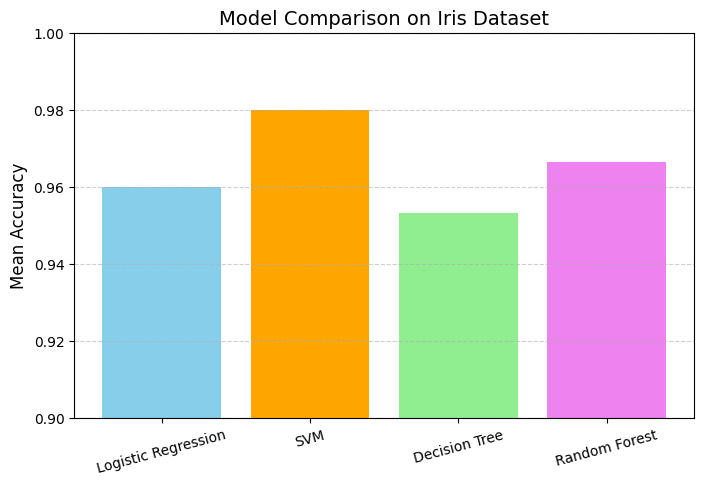

In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', multi_class='ovr'),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

# Evaluate each model using 5-fold cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[name] = scores.mean()
    print(f"{name}: Mean Accuracy = {scores.mean():.3f}, Scores = {scores}")

# Find the best model
best_model = max(results, key=results.get)
print("\n🏆 Best Model:", best_model, "with Accuracy =", results[best_model])

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen', 'violet'])
plt.title("Model Comparison on Iris Dataset", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15)
plt.show()
